In [3]:
import pandas as pd
import numpy as np
print("lets start machine learning")


lets start machine learning


In [5]:
dataset = pd.read_csv(r"IRIS.csv")

In [7]:
dataset.shape # shows the number of rows and the columns in the dataset

(150, 5)

In [4]:
dataset.head() # prints 5 top rows

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
dataset.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
dataset["species"].value_counts() # shows the value counts of the each unique item in it

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [7]:
dataset.isna().sum() # checking if NaN values

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
# lets encode our species column into numerical 
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
dataset["species"] = label_encoder.fit_transform(dataset["species"])

list(label_encoder.classes_) # shows the encoded numbers

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [9]:
list(label_encoder.inverse_transform([ 0, 1 , 2]))

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [13]:
#lets make the feature column 
feature_column = ["sepal_length", "sepal_width" ,  "petal_length", 	"petal_width" ]
x_data = dataset[feature_column].values
y_data = dataset["species"].values

In [18]:
# normalizing is not necessary since values are not so varied or large differenced could be done too
# Splitting the data to the training and testing set

from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x_data , y_data, test_size = 0.30) # 30% data is separated for testing


In [20]:
# TRAINING THE MODEL
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 15).fit(x_train, y_train)

In [21]:
y_pred = model.predict(x_test)

In [22]:

y_pred[0:10]


array([1, 2, 2, 1, 1, 2, 2, 1, 1, 2])

In [23]:
y_test[0:10]

array([1, 2, 1, 1, 1, 2, 1, 1, 1, 2])

In [24]:
# Evaluation metrics
# accuracy_score --> this shows the %accuracy of the model 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)*100
print(f"the accuracy of the KNN model is : {accuracy} %")


the accuracy of the KNN model is : 88.88888888888889 %


In [26]:
# Saving the model using joblib
import joblib 
joblib.dump(model , "KNN_model.pkl") # the model is being saved in the name of KNN_model.pkl (.pkl is pickle type)
KNN_model_reload = joblib.load("KNN_model.pkl")


In [29]:
# finding the optimal value of the K i.e
# USING THE CROSS VALIDATION SCORE FOR THE PARAMETER TUNING
# SINCE THE K MUST BE ODD MAKE A LIST OF ODD NUMBERS

k_list = list(range(1, 50 , 2))
print(k_list)





[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]


In [31]:
from sklearn.model_selection import cross_val_score
cv_scores = []

# creating a loop to iterate on k for finding the k with highest accuracy
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors = k) # creating knn model
    scores = cross_val_score(knn, x_train, y_train , cv = 10 , scoring ="accuracy") # passing the model and training dataset which gives the accuracy scores
    cv_scores.append(scores.mean()) # taking mean of the cv10 accuracy scores and adding to the list


In [32]:
cv_scores[0:5] # the accuracy list for k=1 , 3, 5 , 7, 9 

[np.float64(1.0),
 np.float64(1.0),
 np.float64(1.0),
 np.float64(1.0),
 np.float64(1.0)]

In [38]:
# finding the error by subtracting accuracy from 1

error = []

for i in cv_scores:
    error.append( (1 - i)) # each time the error is added to the list

In [41]:
error[0:5]

[np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0)]

<Figure size 640x480 with 0 Axes>

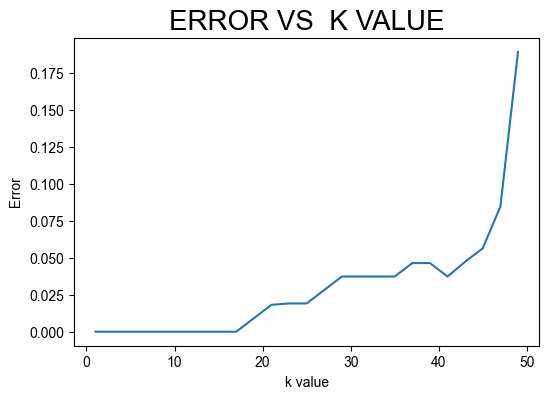

In [42]:
# since the error is here , the minimimum error poroduced by k suggest the better model
# drawing a plot of error with k

from matplotlib import pyplot as plt
import seaborn as sns

plt.figure()
plt.figure(figsize = (6,4))
plt.title("ERROR VS  K VALUE" ,fontsize = 20 , fontweight = 15)
plt.xlabel("k value")
plt.ylabel(" Error ")
sns.set_style("whitegrid")
plt.plot(k_list , error)
plt.show()


In [49]:
print(label_encoder.inverse_transform([0 , 1 , 2])) # this is the output of the model that needs to be modified for user in app

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
